$But$

Le challenge que nous proposons consiste à reconstruire les données manquantes de certaines courbes de consommation électrique en utilisant uniquement d’autres courbes de consommation électrique.
Nous avons utilisé un outil de génération de courbes synthétiques, DeepCourbogen, pour générer environ 69 000 courbes. 1 000 de ces courbes ont subi des suppressions aléatoires de données, pour simuler les données manquantes de courbes réelles.

Le but des challengers est de proposer des remplacements pour les données manquantes (« remplir les trous ») dans les 1 000 courbes.
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

$Description des données$

Pour l’échantillon d’entrainement :

- la donnée d’entrée est une dataframe de 21 000 colonnes. Chacune d’entre elles est une courbe synthétique générée par DeepCourbogen. Chaque nom de colonne est un identifiant () généré aléatoirement. L’index de la dataframe est le timestamp de chaque point, les valeurs de consommation sont en watts. Les 1 000 dernières colonnes contiennent les courbes auquelles il manque des données. Les noms de ces colonnes sont de la forme holed_
- La donnée de sortie est une dataframe de 1 000 colonnes contenant les données complétées des 1 000 dernières colonnes des données d’entrée.
Le fichier d’entrée fait 140 Mo, le fichier de sortie 6 Mo.

Pour l’échantillon de test, la donnée d’entrée est une dataframe de 38140 colonnes (260 Mo), la donnée de sortie fait toujours 1000 colonnes (6 Mo)
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Échantillon d'entraînement
df_X_train = pd.read_csv('X_train_78VdSWL.csv') # Donnée d’entrée, dataframe de 21 000 (140 Mo)
Y_train = pd.read_csv('y_train_u0UkKEh.csv') # Donnée de sortie, 1000 colonnes manquantes (6 Mo)

# Échantillon de test
df_X_test = pd.read_csv('X_test_XKVc4no.csv') # Donnée d’entrée, dataframe de 38140 colonnes (260 Mo)
Y_nouv = pd.read_csv('new_output_sample.csv') # Donnée de sortie, 1000 colonnes manquantes (6 Mo)

In [24]:
df_X_train.columns

Index(['Horodate', '5423908671', '2568793410', '8310762594', '6235194807',
       '423895617', '193845276', '216589743', '218753964', '1794650328',
       ...
       'holed_991', 'holed_992', 'holed_993', 'holed_994', 'holed_995',
       'holed_996', 'holed_997', 'holed_998', 'holed_999', 'holed_1000'],
      dtype='object', length=21001)

On affiche à l'écran le nom de chaque colonne de df_X_train pour pouvoir sélectionner celle que l'on souhaite.

On sélectionne la colonne 'holed_1000' car d'après l'énoncé, c'est une courbe avec des données manquantes.

In [25]:
df_X_test['holed_1000']

0       129.0
1       113.0
2         NaN
3       135.0
4         NaN
        ...  
1052      NaN
1053     78.0
1054     57.0
1055     49.0
1056     42.0
Name: holed_1000, Length: 1057, dtype: float64

On observe bien qu'il y a des valeurs manquante (NaN = une valeur manquante).

Affichons la courbe de données de la colonne holed_1000

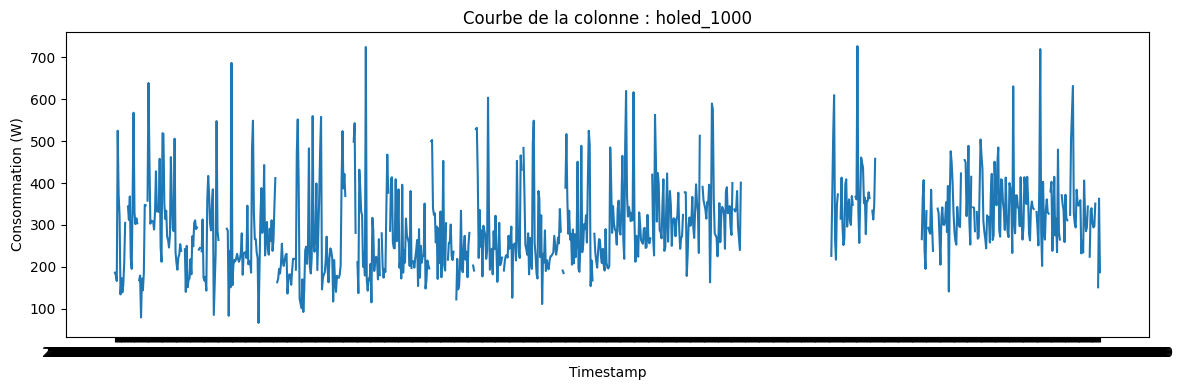

In [26]:
X = df_X_train['Horodate']
Y = df_X_train['holed_1000']
plt.figure(figsize=(12, 4))
plt.plot(X, Y)
plt.title("Courbe de la colonne : holed_1000")
plt.xlabel('Timestamp')
plt.ylabel('Consommation (W)')
plt.tight_layout()
plt.show()


#Problème d'affichage des abscisses...

On observe bien sur la courbe qu'il y a des espaces vides, notre but sera de faire des estimations avec le moins d'erreur possibles pour essayer de remplir ses epaces.

Pour calculer notre erreur nous allons faire une fonction MAE (Erreur Absolue Moyenne) que nous utiliserons dès que nous voudrons évaluer nos estimations.

In [27]:
from sklearn.metrics import mean_absolute_error

def MAE(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE du modèle : {mae:.4f}")

Dans l'énoncé du Challenge, on nous donne comme exemple un "Benchmark" basique consistant à faire de l’interpolation linéaire sur les données manquantes. On a la fonction suivante :

In [28]:
def fill_nan_with_interpolation(column):
    col = column.copy()
    col = col.interpolate(method='linear', limit_direction='both')
    return col

Essayer de l'utiliser pour modéliser le Benchmark.

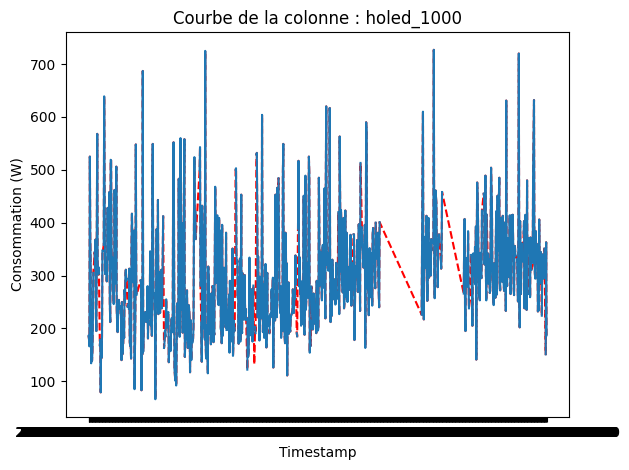

In [41]:
Y_pred = fill_nan_with_interpolation(Y)

plt.plot(X, Y_pred,'r--')
plt.plot(X, Y)
plt.title("Courbe de la colonne : holed_1000")
plt.xlabel('Timestamp')
plt.ylabel('Consommation (W)')
plt.tight_layout()
plt.show()


In [42]:
Y_t = Y_train['holed_1000']
MAE(Y_t,Y_pred)

MAE du modèle : 15.1421
